# Problem Statment

### To predict the sales of each problem in a particular store this will help in understanding  the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation

1- Item weight might effect a sales of the product.

2- Sales of the product may be depends on the items fat content.

3- More Item_Visibility of a particular product may be sold than other products.

4- Item type could have an effect on the sales.

5- The items with more MRP might have more item outlet sales.

6- The stores which have established earlier may have more sales.

7- Size of the stores could have an effect on the item sales at a particular store.

8- Location of the stores might depends on the Item outlet sales.

# Loading Packages and Data

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [417]:
 dfTrain=pd.read_csv('TrainBig.csv')

In [418]:
 dfTest=pd.read_csv('TestBig.csv')

# Working On Train Dataset

# EDA Train Data

In [419]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [420]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [421]:
dfTrain.shape

(8523, 12)

In [422]:
dfTrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [423]:
dfTrain.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There is nulls in Item_Weight and Outlet_Size

# Univariate Analysis


A distribution plot of Item_Weight

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


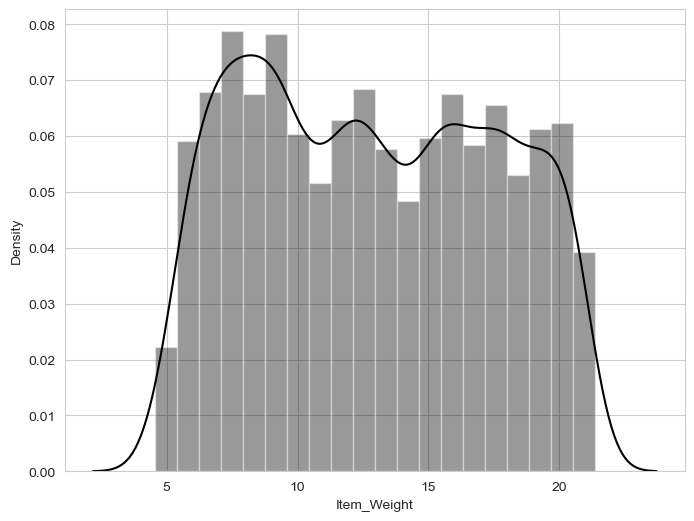

In [424]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(dfTrain['Item_Weight'], color='black');
sns.despine;

We can observe 3 categories of weight (5-10,11-15,16-20)

Bar char for Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


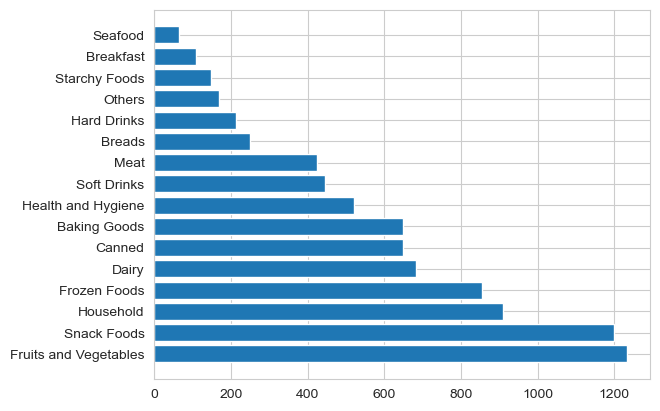

In [425]:
types = dfTrain['Item_Type'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center')
plt.show()

We can conclude that Fruits and Vegetables are the most we have in the stores

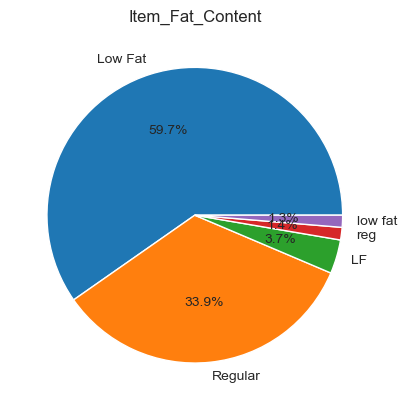

In [426]:
fat_counts = dfTrain['Item_Fat_Content'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(fat_counts, labels=fat_counts.index, autopct='%1.1f%%')

# Add a title
ax.set_title('Item_Fat_Content')

# Show the plot
plt.show()

We conclude that we have more than half 59.7% low fat

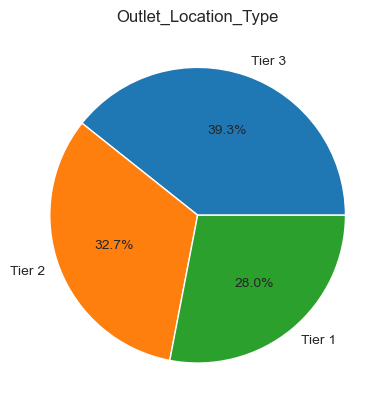

In [427]:
counts = dfTrain['Outlet_Location_Type'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title
ax.set_title('Outlet_Location_Type')

# Show the plot
plt.show()

Tier 3 has more outlets

Now we plot the Item_Visibility by using distplot

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


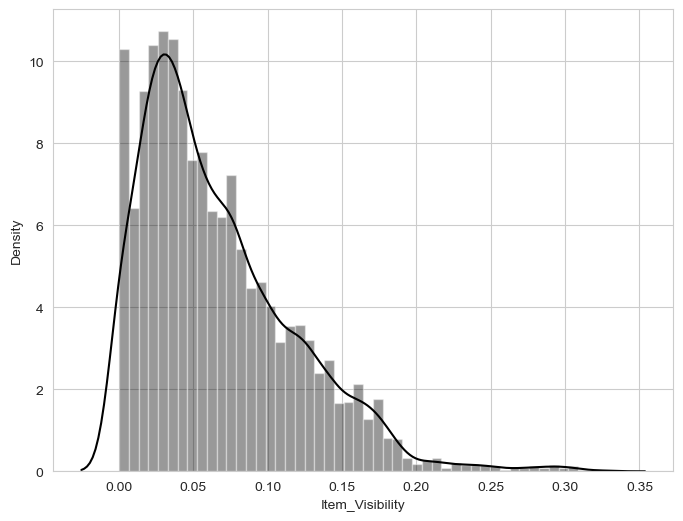

In [428]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(dfTrain['Item_Visibility'], color='black');
sns.despine;

There is items it's visability equal zero and it is not impossible we must handle it

Plot a bar graph for Outlet_Identifier

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


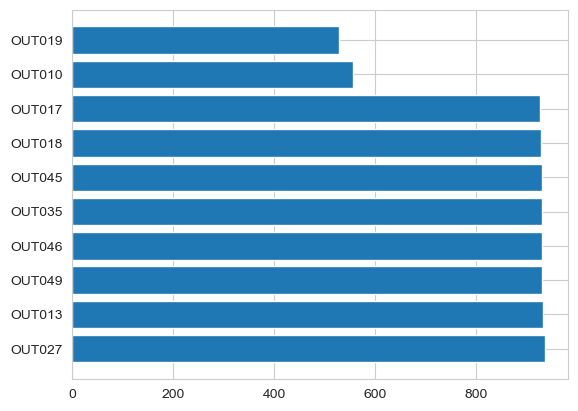

In [429]:
types = dfTrain['Outlet_Identifier'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center')
plt.show()

OUT045 has the greatest items

See the established year of the outlets

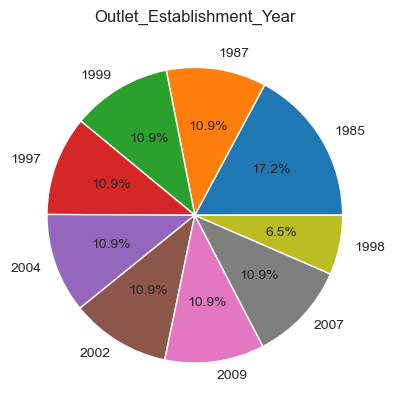

In [430]:
counts = dfTrain['Outlet_Establishment_Year'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title
ax.set_title('Outlet_Establishment_Year')

# Show the plot
plt.show()

A countplot for checking how the different sized Outlets are distributed

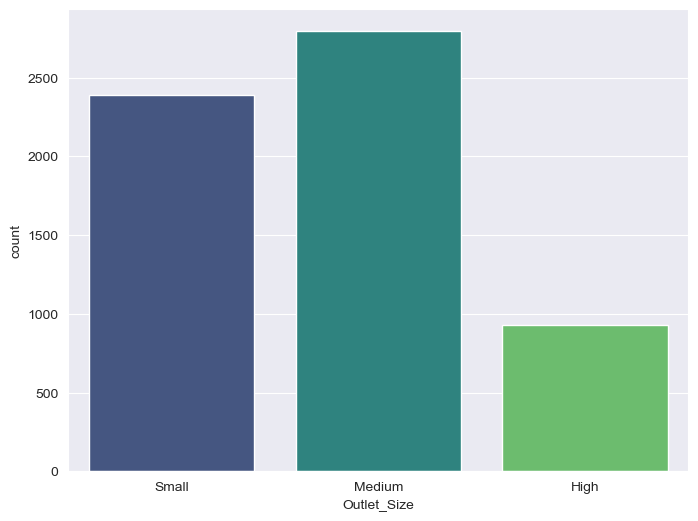

In [431]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Size', data=dfTrain, palette="viridis", order=['Small', 'Medium', 'High']);
sns.despine;

There are different categories for Outlet Size:

Small
Medium
High

Most of the stores are of Medium Size type.
A small number of them are Small Sized.
And very less number of stores are Large Sized.

Bar graph to see the types of our outles

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


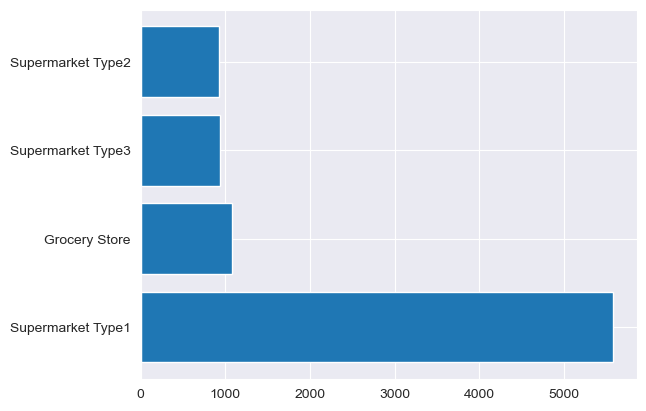

In [432]:
types = dfTrain['Outlet_Type'].value_counts()
print(types)
plt.barh(types.keys(),types,align='center')
plt.show()

Most of outlets are of type supermarket 1

### Check for outliers

<AxesSubplot:>

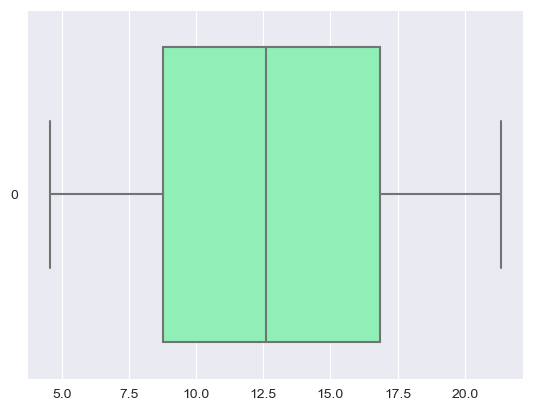

In [433]:
sns.boxplot(data=dfTrain['Item_Weight'],palette='rainbow',orient='h')

<AxesSubplot:>

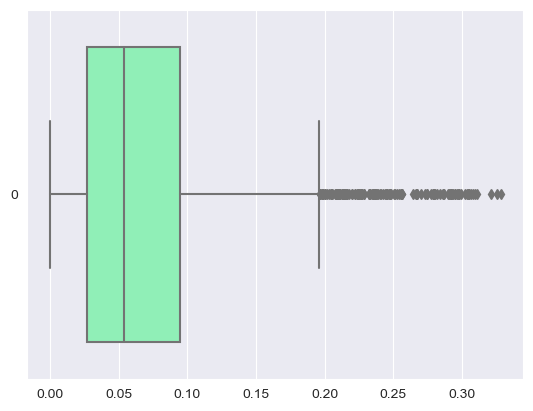

In [434]:
sns.boxplot(data=dfTrain['Item_Visibility'],palette='rainbow',orient='h')

<AxesSubplot:>

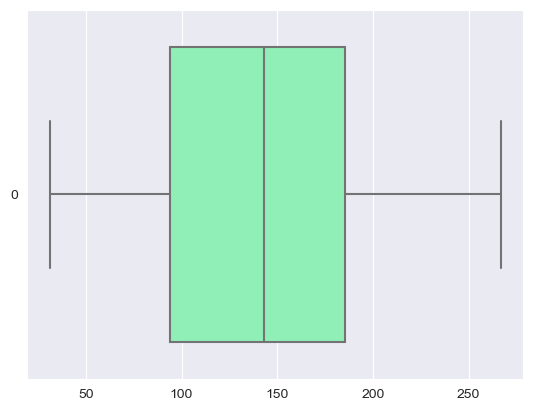

In [435]:
sns.boxplot(data=dfTrain['Item_MRP'],palette='rainbow',orient='h')

<AxesSubplot:>

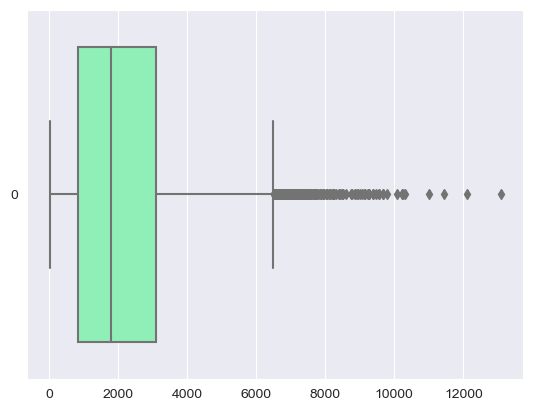

In [436]:
sns.boxplot(data=dfTrain['Item_Outlet_Sales'],palette='rainbow',orient='h')

Item visability and outlet sales have a lot of outliers

# Bivariate Analysis

<AxesSubplot:>

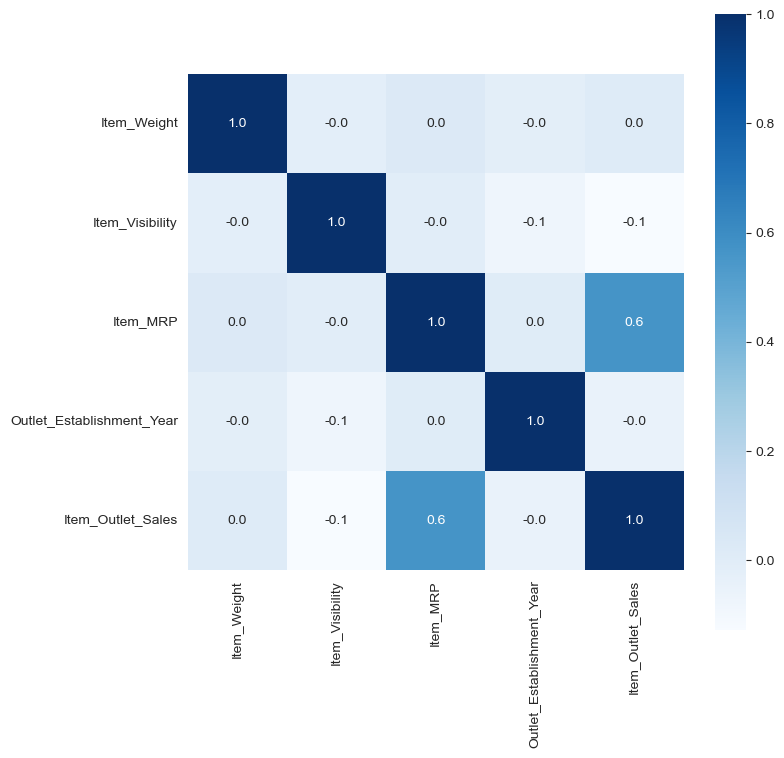

In [437]:
# Check correlation between variables
corr = dfTrain.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

There is a colleration between Item_MRP and Item_Outle_Sales

A scatterplot of Item_Outlet_Sales vs Item_MRP

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

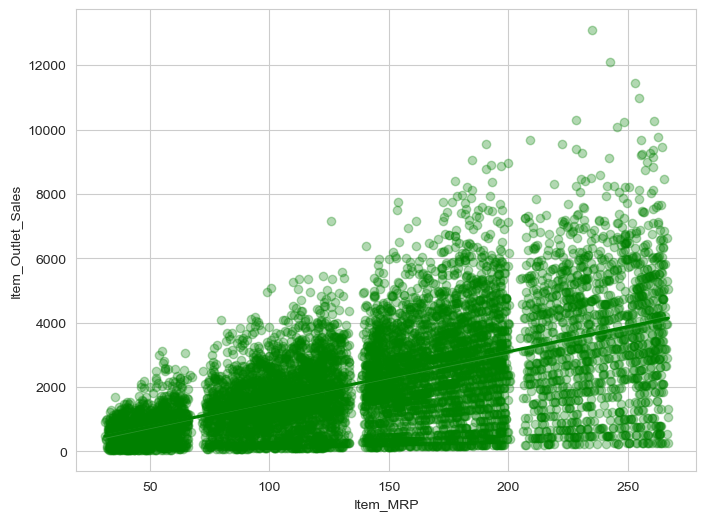

In [438]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.regplot('Item_MRP', 'Item_Outlet_Sales', data=dfTrain, x_jitter=0.3, scatter_kws={'alpha':0.3}, color='green')

A boxplot of Item_Outlet_Sales vs Outlet_Size

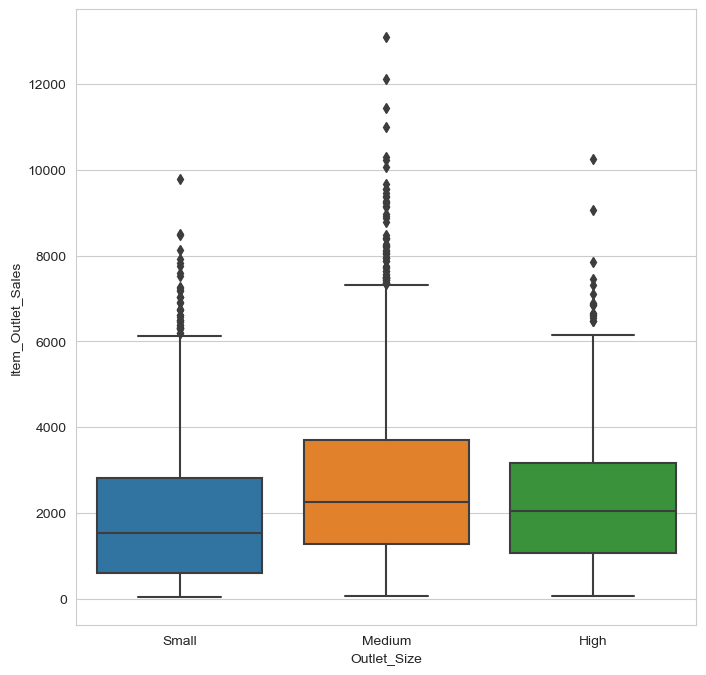

In [439]:
plt.figure(figsize=(8,8))
sns.boxplot('Outlet_Size', 'Item_Outlet_Sales', data=dfTrain, order=['Small', 'Medium', 'High']);

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


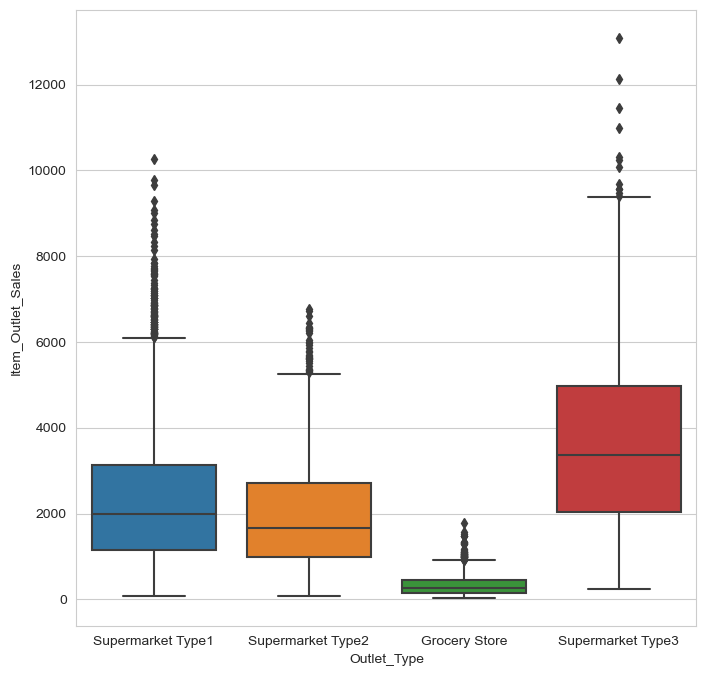

In [440]:
plt.figure(figsize=(8,8))
sns.boxplot('Outlet_Type', 'Item_Outlet_Sales', data=dfTrain);

# Missing Value Treatment

we found nulls in Item_Weight and Outlet_Size

Since item weight is numrical we can replace it with mean.
and while outlet size is categorical we will replace it with mode.

In [441]:
dfTrain['Item_Weight']=dfTrain['Item_Weight'].fillna(dfTrain['Item_Weight'].mean())

In [442]:
print(dfTrain['Outlet_Size'].mode())
dfTrain['Outlet_Size']=dfTrain['Outlet_Size'].fillna('Medium')

0    Medium
Name: Outlet_Size, dtype: object


In [443]:
dfTrain.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now our train data is free of nulls

# PreProcessing Data

we found that there's items its visability equal zero and it is not impossible we must handle it

In [444]:
dfTrain['Item_Visibility'] = dfTrain['Item_Visibility'].replace({0:dfTrain['Item_Visibility'].mean()})

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


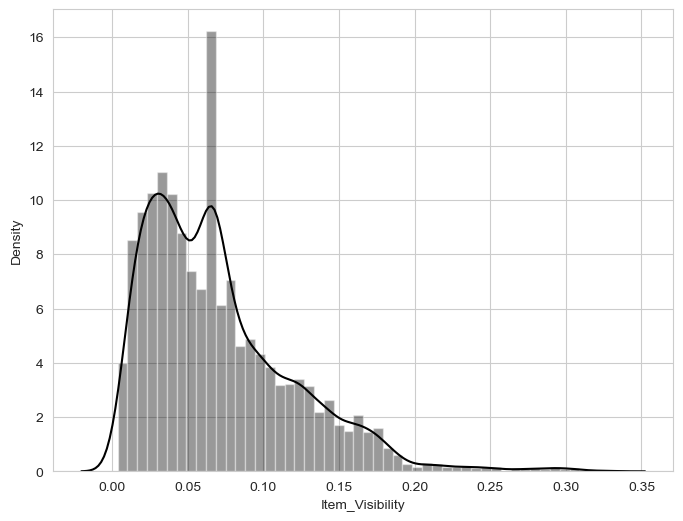

In [445]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(dfTrain['Item_Visibility'], color='black');
sns.despine;

In Item_Fat_Content we found that they are not the same name

In [446]:
dfTrain['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

So we will replace LF,low fat with "Low Fat" and reg with "Regular"

In [447]:
dfTrain['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
dfTrain['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
dfTrain['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [448]:
dfTrain['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Feature Engineering

In [449]:
print(dfTrain['Item_Type'].nunique())
print(dfTrain['Item_Type'].unique())

16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


There is 16 type but we need to decrease the number 

In [450]:
dfTrain['Item_Type_Combined'] = dfTrain['Item_Identifier'].apply(lambda x : x[0:2])
dfTrain['Item_Type_Combined'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type_Combined, dtype: object

In [451]:
dfTrain['Item_Type_Combined'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [452]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [453]:
dfTrain['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

The stores which are opened from a longer period of time might have higher sales as it sounds practical to relate them, because a store which is opened from longer time might have many clients associated with them for a long time, who would prefer to buy more items from the store.
So, having the Operation Years for each store can be a good predictor.

In [454]:
dfTrain['Outlet_Operation_Years'] = 2013 - dfTrain['Outlet_Establishment_Year']

In [455]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Operation_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [456]:
dfTrain['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Encoding Categorical Variables

# Label Encoding

In [457]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
encode = LabelEncoder()

for item in categorical_cols:
  dfTrain[item] = encode.fit_transform(dfTrain[item])
     

LabelEncoder encodes categories into numbers as 0, 1, 2, and so on..

So our model might get confuse and give more weightage to category with higher number which is not the case.

So, we have to create dummies in order to give equal importance to each category present.

In [458]:
dfTrain = pd.get_dummies(dfTrain, columns=categorical_cols)

In [459]:
dfTrain.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,4,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,1998,732.3800,15,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.066132,Household,53.8614,1987,994.7052,26,1,0,...,0,1,0,0,0,0,0,0,0,0


In [460]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Item_Outlet_Sales          8523 non-null   float64
 7   Outlet_Operation_Years     8523 non-null   int64  
 8   Item_Fat_Content_0         8523 non-null   uint8  
 9   Item_Fat_Content_1         8523 non-null   uint8  
 10  Outlet_Location_Type_0     8523 non-null   uint8  
 11  Outlet_Location_Type_1     8523 non-null   uint8  
 12  Outlet_Location_Type_2     8523 non-null   uint8  
 13  Outlet_Size_0              8523 non-null   uint8

# Working On Test Data

# EDA & preprocessing 

In [461]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [462]:
dfTest.shape

(5681, 11)

we found that there's items its visability equal zero and it is not impossible we must handle it

In [463]:
dfTest['Item_Visibility'] = dfTest['Item_Visibility'].replace({0:dfTest['Item_Visibility'].mean()})

/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


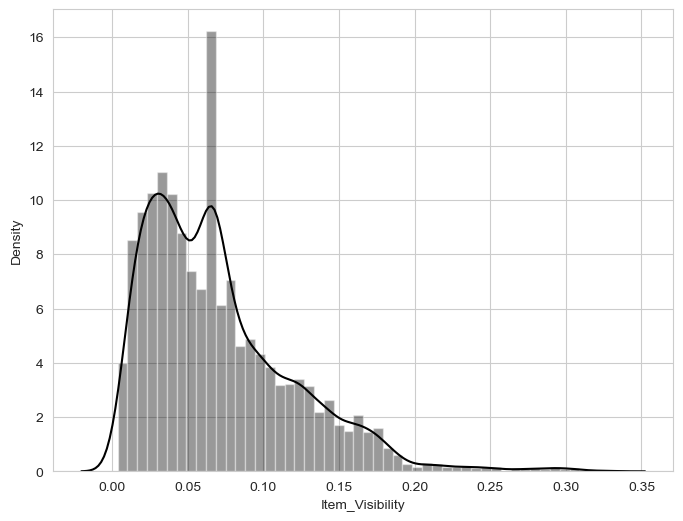

In [464]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(dfTrain['Item_Visibility'], color='black');
sns.despine;

### Checking for nulls and handling it

In [465]:
dfTest.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [466]:
dfTest['Item_Weight']=dfTrain['Item_Weight'].fillna(dfTrain['Item_Weight'].mean())

In [467]:
print(dfTest['Outlet_Size'].mode())
dfTest['Outlet_Size']=dfTest['Outlet_Size'].fillna('Medium')

0    Medium
Name: Outlet_Size, dtype: object


In [468]:
dfTest.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [469]:
dfTest.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.931278,0.069765,141.023273,1997.828903
std,4.253478,0.048394,61.809091,8.372256
min,4.555000,0.003591,31.990000,1985.000000
25%,9.395000,0.033208,94.412000,1987.000000
50%,12.857645,0.062137,141.415400,1999.000000
75%,16.200000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [470]:
dfTest['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [471]:
dfTest['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
dfTest['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
dfTest['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [472]:
dfTest['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Feature Engineering

In [473]:
dfTest['Item_Type_Combined'] = dfTest['Item_Identifier'].apply(lambda x : x[0:2])
dfTest['Item_Type_Combined'].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [474]:
dfTest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDW58,9.30,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD
1,FDW14,5.92,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD
2,NCN55,17.50,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NC
3,FDQ58,19.20,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,FD
4,FDY38,8.93,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD


In [475]:
dfTest['Outlet_Operation_Years'] = 2013 - dfTest['Outlet_Establishment_Year']

# Encoding Categorical Variables

In [476]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
encode = LabelEncoder()

for item in categorical_cols:
  dfTest[item] = encode.fit_transform(dfTest[item])

In [477]:
dfTest = pd.get_dummies(dfTest, columns=categorical_cols)

In [478]:
dfTest.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDW58,9.30,0.007565,Snack Foods,107.8622,1999,14,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,5.92,0.038428,Dairy,87.3198,2007,6,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,17.50,0.099575,Others,241.7538,1998,15,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,19.20,0.015388,Snack Foods,155.0340,2007,6,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,8.93,0.118599,Dairy,234.2300,1985,28,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [479]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Operation_Years     5681 non-null   int64  
 7   Item_Fat_Content_0         5681 non-null   uint8  
 8   Item_Fat_Content_1         5681 non-null   uint8  
 9   Outlet_Location_Type_0     5681 non-null   uint8  
 10  Outlet_Location_Type_1     5681 non-null   uint8  
 11  Outlet_Location_Type_2     5681 non-null   uint8  
 12  Outlet_Size_0              5681 non-null   uint8  
 13  Outlet_Size_1              5681 non-null   uint8

# Modeling

# Seperating Training And Test Data

In [480]:
X = dfTrain.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'], axis=1)
Y= dfTrain['Item_Outlet_Sales']
x_train, x_test , y_train , y_test = train_test_split(X,Y ,test_size= 0.15,random_state=44)

# Preparing the test data for prediction

In [517]:
y_Test=dfTest.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year'], axis=1)

# Linear Regression using sklearn

In [482]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

# Accuracy

In [483]:
model.score(x_test,y_test)*100

58.430031293880006

# Regularized linear regression

### Ridge regression and Lasso regression.

Ridge regression is like trying to draw a line that fits the dots on a graph while also keeping the line as straight as possible. It does this by adding a penalty to the line for any slopes that are too big. So if the line starts to wiggle too much to fit the dots, Ridge regression will make it straighten out a bit. This helps to prevent overfitting, which is when the line fits the dots too closely and doesn't work well for new dots that aren't on the graph.

Lasso regression is like trying to draw a line that fits the dots on a graph while also keeping the line as simple as possible. It does this by adding a penalty to the line for any slopes that are not needed. So if the line has a slope that doesn't help it fit the dots well, Lasso regression will make that slope go to zero. This helps to select only the most important features and eliminate any that don't contribute much to the prediction.

Think of Ridge regression like a teacher who wants you to stay on track while you write a story. If you start to ramble too much, the teacher will remind you to stick to the point.

And think of Lasso regression like a cleaner who wants to tidy up your room. If there are too many toys and books lying around that you don't need, the cleaner will put them away to make your room look neat and organized.

### Elastic Net
is a type of regularized linear regression that combines the features of Ridge and Lasso regression.

Like Ridge regression, Elastic Net adds a penalty to the line for any slopes that are too big. And like Lasso regression, it adds a penalty for any slopes that are not needed. The difference is that Elastic Net uses a combination of both penalties.

Elastic Net is useful when you have a lot of features in your data and some of them are highly correlated with each other. In this case, Ridge regression may not work well because it will keep all of the correlated features, whereas Lasso regression will only keep one of them. Elastic Net can find a balance between keeping all of the correlated features and eliminating the unnecessary ones.

## Ridge regression

In [487]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
alpha_ridge = 0.1  # regularization parameter
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
accuracy = ridge_model.score(x_test, y_test)*100
print(accuracy)

58.4300923887015


## Lasso Regression


In [488]:
alpha_lasso = 0.1  # regularization parameter
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
accuracy = lasso_model.score(x_test, y_test)*100
print(accuracy)

58.43221311750717


/Users/habibaalaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+09, tolerance: 2.127e+06
  model = cd_fast.enet_coordinate_descent(


## Elastic Net Regression

In [489]:
alpha_elastic = 0.1  # regularization parameter
l1_ratio = 0.5  # ratio of L1 and L2 penalty
elastic_model = ElasticNet(alpha=alpha_elastic, l1_ratio=l1_ratio)
elastic_model.fit(x_train, y_train)
y_pred_elastic = elastic_model.predict(x_test)
accuracy = elastic_model.score(x_test, y_test)*100
print(accuracy)

57.68788362049301


## We conclude that all the types of regression in not giving a good accuracy so we  will use another algorithm to help us improve the accuracy

# Ensemble learning methods

Ensemble learning is a technique that combines multiple models to improve the overall performance of a machine learning algorithm. The idea behind ensemble learning is that by combining the predictions of multiple models, we can reduce the risk of overfitting, increase the stability of the model, and improve the accuracy of predictions.

There are several types of ensemble learning methods, including:

### 1- Bagging
Bagging (short for bootstrap aggregating) is a technique that involves training multiple instances of the same model on different random subsets of the training data. The final prediction is obtained by averaging the predictions of all the individual models.

#### Examples of bagging methods include random forests and bootstrap aggregating.

### 2- Boosting
Boosting is a technique that involves training multiple weak models sequentially, where each subsequent model focuses on the examples that were misclassified by the previous models. The final prediction is obtained by combining the predictions of all the individual models.

#### Examples of boosting methods include AdaBoost ,XGboost and gradient boosting.

Ensemble learning methods are widely used in machine learning, and have been shown to be effective in improving the performance of a wide range of models.

## RandomForest

### Building and Training the model

In [490]:
from sklearn.ensemble import RandomForestRegressor

In [491]:
rf = RandomForestRegressor()

In [492]:
rf.fit(x_train, y_train)

RandomForestRegressor()

### Accuracy

In [493]:
rfpredict = rf.predict(x_test)

In [494]:
rf.score(x_test, y_test)*100

57.90545072034181

We got a low accuracy so we will fine-tune 'max_depth' and 'n_estimators' parameters for our RandomForest Regressor we can use GridSearch but it consume a ot of time. So we will make it manually.


Grid search is a technique used in machine learning to find the best combination of hyperparameters for a given model. Hyperparameters are parameters that are not learned from the data, but instead are set by the user before training the model. In the case of Random Forest, hyperparameters can include the number of trees in the forest, the maximum depth of each tree, and the number of features considered at each split, among others.

Grid search works by defining a grid of hyperparameter values to try out, and then training and evaluating a model for each combination of values in the grid. The best set of hyperparameters is then chosen based on the model's performance on a validation set. This process can be time-consuming, but it can lead to significant improvements in model performance.

## Training with tuned - parameters

In [495]:
rf = RandomForestRegressor(max_depth=6,n_estimators = 500, random_state = 46)

In [496]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500, random_state=46)

In [497]:
rfpredict = rf.predict(x_test)

In [498]:
rf.score(x_test, y_test)*100

62.513211179183116

### When we tuned-Parameters we got a better accuracy but not the one we target so we will use another algorithm

# XGBoost

### Sacling of numeric columns

In [499]:
numeric_cols = ["Item_Weight", "Item_Visibility","Item_MRP","Item_Outlet_Sales"]

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the numeric columns
dfTrain[numeric_cols] = scaler.fit_transform(dfTrain[numeric_cols])


In [500]:
import xgboost as xgb

In [501]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.12, max_depth=4)

In [502]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [503]:
y_pred = xgb_model.predict(x_test)
xgb_model.score(x_test, y_test)*100

62.71795152106823

# Gradient Boosting Regression (GBR)

In [504]:
from sklearn.ensemble import GradientBoostingRegressor

In [505]:
gbr = GradientBoostingRegressor(n_estimators=70, learning_rate=0.05, max_depth=4)

In [506]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=70)

In [507]:
y_pred = gbr.predict(x_test)
gbr.score(x_test, y_test)*100

62.74000154631387

## Predictions On Test Dataset using GBR

In [518]:
y_predict=model.predict(y_Test)
print(y_predict)

[1876.43961815 1604.52606462 1859.06952679 ... 1815.45601683 3561.34225979
 1265.8501024 ]


In [531]:
y_Test['Outlet Sales Prediction']=y_predict

In [534]:
y_Test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet Sales Prediction
0,9.30,0.007565,107.8622,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1876.439618
1,5.92,0.038428,87.3198,6,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1604.526065
2,17.50,0.099575,241.7538,15,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1859.069527
3,19.20,0.015388,155.0340,6,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2599.820168
4,8.93,0.118599,234.2300,28,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,5169.519425


# Summary

We performed Exploratory Data Analysis of the dataset of Big Mart Sales ,we decided which variables can be good predictors and which variables on some modification can perform the task of a good predictor for the Sales.

Then we performed feature engineering on our dataset as required. We modified some columns Label encoded the columns, and created dummy variables.

In order to find a decent model to predict sales we use a various machine learning models.

# Conclusion

After preforming linear regression we got accuracy=58.43% and same for regualized linear regression.

So We decided to use Ensemble learning methods:
Random forest accuracy=58.14%
XGboost=62.72%
GBR=62.74%

### As the difference in accuracies is small but the approach of GBR gives the best accuracy.